## Imports

Here are all the imports needed to run the **Jupyter Notebook**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Extract data

In this section, data is extracted from a **dataset** in **.csv** format to be able to work with this information and plot it. 

In [2]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Filter data

In this part the data is filtered, leaving out all the information that is considered irrelevant. 

In [3]:
df = df.drop(columns=['sex', 'bmi', 'children', 'smoker', 'region'])
df.head(10)

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
5,31,3756.62160
6,46,8240.58960
7,37,7281.50560
8,37,6406.41070
9,60,28923.13692


## Data graphics 

Each of the data with which the **Linear Regression Algorithm** will be trained is plotted here.

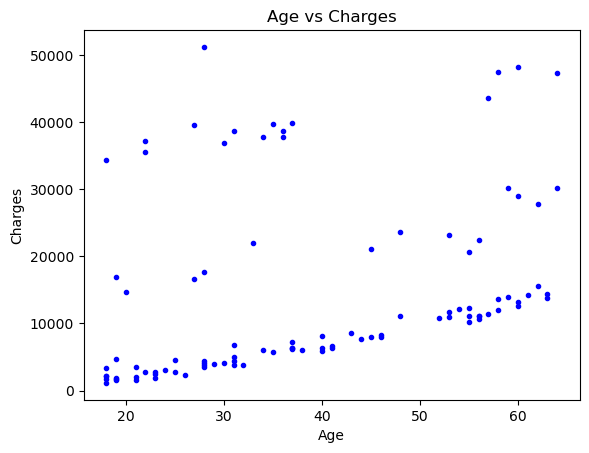

In [4]:
plt.plot(df['age'], df['charges'], 'b.')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

## Training model

In this small section of code, all the information already filtered is passed to proceed with the training of the **machine learning model**.

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(df[['age']], df[['charges']])

LinearRegression()

In [8]:
lin_reg.intercept_

array([3647.56613883])

In [9]:
lin_reg.coef_

array([[281.29547985]])

In [10]:
X_min_max = np.array([[df['age'].min()], [df['age'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

c:\Users\Sebastián Dosman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Hypothesis function graphic  

Once the **model** has been trained, a line is generated which should adapt as well as possible to the different **training data**, as shown in the following graph.

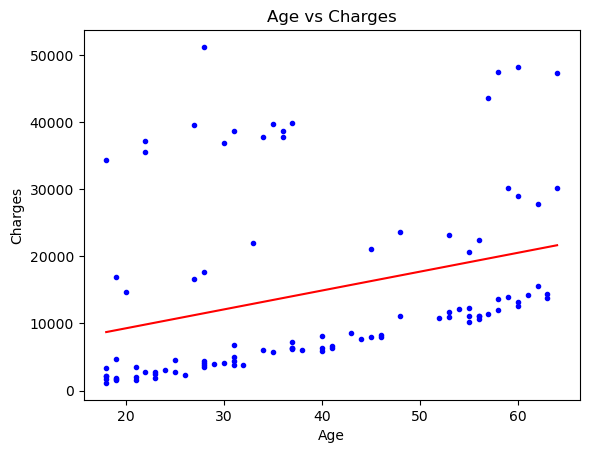

In [11]:
plt.plot(X_min_max, y_train_pred, 'r-')
plt.plot(df['age'], df['charges'], 'b.')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

## New predictions

Now it is possible to start making new **predictions** for which the **trained model** is already prepared.

In [13]:
x_new = np.array([[37]])
charges = lin_reg.predict(x_new)

print('The charges for a 37 year old is: ', charges[0])

The charges for a 37 year old is:  [14055.49889331]


c:\Users\Sebastián Dosman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prediction graphic

Finally, it can be seen how the **prediction** is within the trend line generated by the **model** for its prediction.

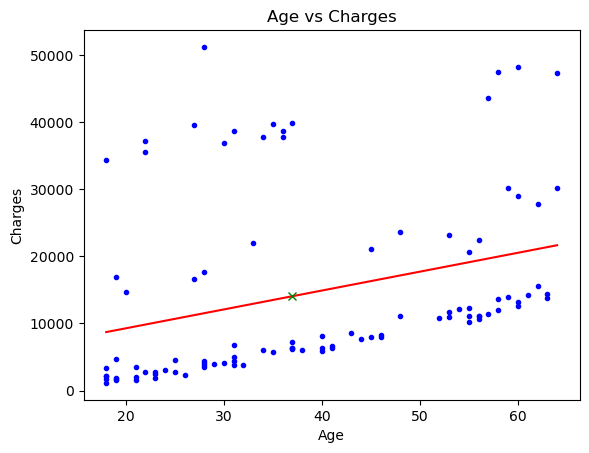

In [15]:
plt.plot(X_min_max, y_train_pred, 'r-')
plt.plot(df['age'], df['charges'], 'b.')
plt.plot(x_new, charges, 'gx')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()